# Searching, Sorting, and Timing

## Agenda

1. Timing
2. Prelude: Timing list indexing
3. Linear search
4. Binary search
5. Insertion sort

## 1. Timing

In [3]:
import time
time.time()

1473281080.049112

In [11]:
start = time.time()
time.sleep(1)
end = time.time()
print (end-start)

1.0013186931610107


In [17]:
from time import time,sleep
time()

1473281593.3924115

In [80]:
start = time()
sum(range(10**6))
end = time()
end - start

0.044284820556640625

In [83]:
def timeit(f):
    start = time()
    f()
    end = time()
    return end - start

In [84]:
timeit(lambda: sum(range(10**6)))

0.04451394081115723

In [114]:
def timeit(f):
    duration  = 0
    for _ in range(100):
        start = time()
        f()
        end = time()
        duration += end - start
    return duration /100

In [341]:
timeit(lambda: sum(range(10*6)))

2.3651123046875e-06

In [346]:
import timeit
timeit.timeit(stmt = 'sum(range(10**6))', number = 100)

4.068855759000144

In [351]:
import timeit
import random
lst = [random.random() for _ in range(100)]

timeit.timeit(stmt = 'sorted(lst)',
             setup = 'import random; lst = [random.random() for _ in range(10000)]',
              number = 100)

0.45338098399952287

In [355]:
import random
def to_time(lst):
    
    pass

timeit.timeit(stmt = 'to_time(lst)',
              setup = 'import random; lst = [random.random() for _ in range(10000)]',
              globals = globals(),
              number = 1000)


0.000135852002131287

## 2. Prelude: Timing list indexing

In [421]:
import timeit
timeit.timeit(stmt='lst[0]',
              setup='import random; lst=[0] * 10**6')

0.04890844100009417

In [469]:
timeit.timeit(stmt='lst[10**6-1]',
              setup='import random; lst=[0] * 10**6')

0.04826739399868529

In [471]:
'lst[{}]'.format('hello')

'lst[hello]'

In [472]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(size):
        times[i] += timeit.timeit(stmt='lst[{}]'.format(i),
                                  globals=globals(),
                                  number=10)

In [482]:
times

[0.00017438799113733694,
 0.00015987699589459226,
 0.00015885497850831598,
 0.0001580110147187952,
 0.00016028200116124935,
 0.0001643530049477704,
 0.00015808898024260998,
 0.00015746901408419944,
 0.0001592170119693037,
 0.00015862202781136148,
 0.00016007801605155692,
 0.00015997400259948336,
 0.00015967001309036277,
 0.00015846897076698951,
 0.00016016401423257776,
 0.0001583640078024473,
 0.00015966897990438156,
 0.00015890800932538696,
 0.00016059399786172435,
 0.00016900799892027862,
 0.0001601089934410993,
 0.00015774099301779643,
 0.00015851601347094402,
 0.00015691600856371224,
 0.00015799600441823713,
 0.00015905297550489195,
 0.00017851101074484177,
 0.00016581999807385728,
 0.0001580640091560781,
 0.00015917999917292036,
 0.0001801710095605813,
 0.00016005197539925575,
 0.0001600700088602025,
 0.0001575799979036674,
 0.0001599420102138538,
 0.0001582280165166594,
 0.00015909498324617743,
 0.0001576129870954901,
 0.00015892000374151394,
 0.00015769098536111414,
 0.000158872

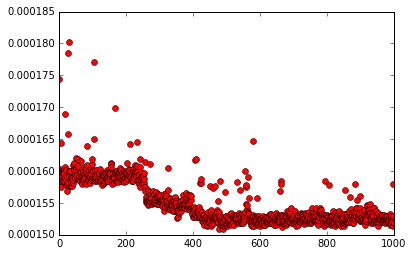

In [486]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

Accessing an element in a list by index always takes the same amount of time, regardless of position. I.e., indexing incurs a *constant time* delay.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [488]:
def index(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return i
    return None

In [489]:
lst = list(range(100))
index(lst, 10)

10

In [490]:
index(lst, 99)

99

In [492]:
print(index(lst, -1))

None


In [493]:
def index(lst, x):
    raise ValueError(x)
    #This is how an exception is raised

In [494]:
index(lst, 10)

ValueError: 10

In [ ]:
index(lst, -1)

In [ ]:
try:
    print('Value found at', index(lst, -1))
except ValueError as e:
    print('Value not found:', e)

In [ ]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=100))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

In [ ]:
def index(lst, x):
    # assume that lst is sorted!!!
    hi = len(lst-1)
    lo = 0
    mid = (lo + hi) // 2 #integer division
    while lo <= hi and lst[mid] != x:
        if(lst[mid] < x):
            lo = mid + 1
            break
        else:
            hi = mid - 1
        mid = (lo + hi) // 2 #integer division
        
    if lst[mid] == x:
        return mid
    return None
        
        
        
    return None

In [ ]:
lst = list(range(1000))
index(lst, 10)

In [ ]:
index(lst, 999)

In [ ]:
index(lst, -1)

In [ ]:
for i in range(len(lst)):
    assert(i == index(lst, i))

In [ ]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=1000))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [ ]:
import timeit
import random
times = []
for size in range(100, 10000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, -1)'.format(random.randrange(size)),
                               globals=globals(),
                               number=10000))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [ ]:
import timeit
import random
times = []
for e in range(5, 20):
    lst = list(range(2**e))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=100000))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

In [ ]:
import random
lst = list(range(1000))
random.shuffle(lst)

In [ ]:
plt.plot(lst, 'ro')
plt.show()

In [ ]:
def insertion_sort(lst):
    pass

In [ ]:
insertion_sort(lst)

In [ ]:
plt.plot(lst, 'ro')
plt.show()

In [ ]:
import timeit
import random
times = []
for size in range(100, 5000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='random.shuffle(lst)',
                               globals=globals(),
                               number=1))

In [ ]:
plt.plot(times, 'ro')
plt.show()